In [1]:
#Import modules

import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp


print("Import successfull")

Import successfull


In [2]:
#Connection to database
conn = psycopg2.connect(database="goat", user="goat", password="earlmanigault", host="localhost", port="65432")
cur = conn.cursor()
print("Opened database successfully")

Opened database successfully


In [3]:
#Load data and pre processing
data = pd.read_sql_query("SELECT a.*, p.* from grid_access a, grid_population p where a.grid_id = p.grid_id;", conn, index_col=None, coerce_float=True, params=None, parse_dates=None, chunksize=None)
print("Tables selected successfully")

Tables selected successfully


In [5]:
#Define categories and amenities in grid_access table
amenities_food = ['Food_Retail','Supermarket','Discount_Supermarket','Organic']
amenities_education = ['Kindergarten','Nursery','After_school','Grundschule','Hauptschule_mittelschule','Realschule','Gymnasium']
amenities_health = ['Pharmacy','General_Practitioner','Paediatrician','Gynaecologist','Dentist']
amenities_transport = ['bus_stop','tram_stop','subway_entrance','rail_station']
#origin = ['nomigr','migr','foreigner']

In [6]:
#Define Lorenz-Curve Function
def lorenz(data, amenities, column2):
    a = plt.figure(num=1,dpi=500)
    axes = a.add_axes([0.1,0.1,0.8,0.8])
    axes.set_xlim([0,1])
    axes.set_ylim([0,1])
    axes.set_xlabel('Share of Population')
    axes.set_ylabel('Share of Accessibility')
    axes.grid(True, color ='#EEEEEE')
    perfect_line = plt.plot ([0,1],[0,1], label = 'Line of Absolute Equality', color = 'black')
    for category in amenities:
        df1 = data[data[category.lower()]>0]
        df2 = df1[df1[column2]>0]
        order_ai = df2.sort_values(by=[category.lower()], ascending=True)
        order_pop = df2.sort_values(by=[column2], ascending=True)
        sum_ai = np.sum(order_ai[category.lower()])
        sum_pop = np.sum(order_ai[column2])
        cumsum_ai = np.cumsum(order_ai[category.lower()])
        cumsum_pop = np.cumsum(order_ai[column2])
        x = cumsum_pop/sum_pop
        y = cumsum_ai/sum_ai
        lorenz = plt.plot(x,y, label = category)
    plt.legend(loc='upper left')
    plt.show()

In [7]:
#Define Gini-Coefficient function
def gini (data, amenities, column2):
    for category in amenities:
        df1 = data[data[category.lower()]>0]
        df2 = df1[df1[column2]>0]
        order_ai = df2.sort_values(by=[category.lower()], ascending=True)
        order_pop = df2.sort_values(by=[column2], ascending=True)
        sum_ai = np.sum(order_ai[category.lower()])
        sum_pop = np.sum(order_ai[column2])
        cumsum_ai = list(np.cumsum(order_ai[category.lower()]))
        cumsum_pop = list(np.cumsum(order_ai[column2]))
        x = list(cumsum_pop/sum_pop)
        y = list(cumsum_ai/sum_ai)
        for i in range(len(cumsum_ai)):
            if i < 1:
                ca = 0
            if i >= 1:
                ca = ca + 0.5 * (y[i-1]+y[i]) * (x[i]-x[i-1])
        ca = 0.5 - ca
        gini = ca*((2*np.count_nonzero(df2))/(np.count_nonzero(df2)-1))
        print(category, gini)

Kindergarten 0.10773222920373025
Nursery 0.16980857771801883
After_school 0.18093199015430803
Grundschule 0.12316549231492283
Hauptschule_mittelschule 0.2685546513310434
Realschule 0.29214404966424534
Gymnasium 0.3864639352598006


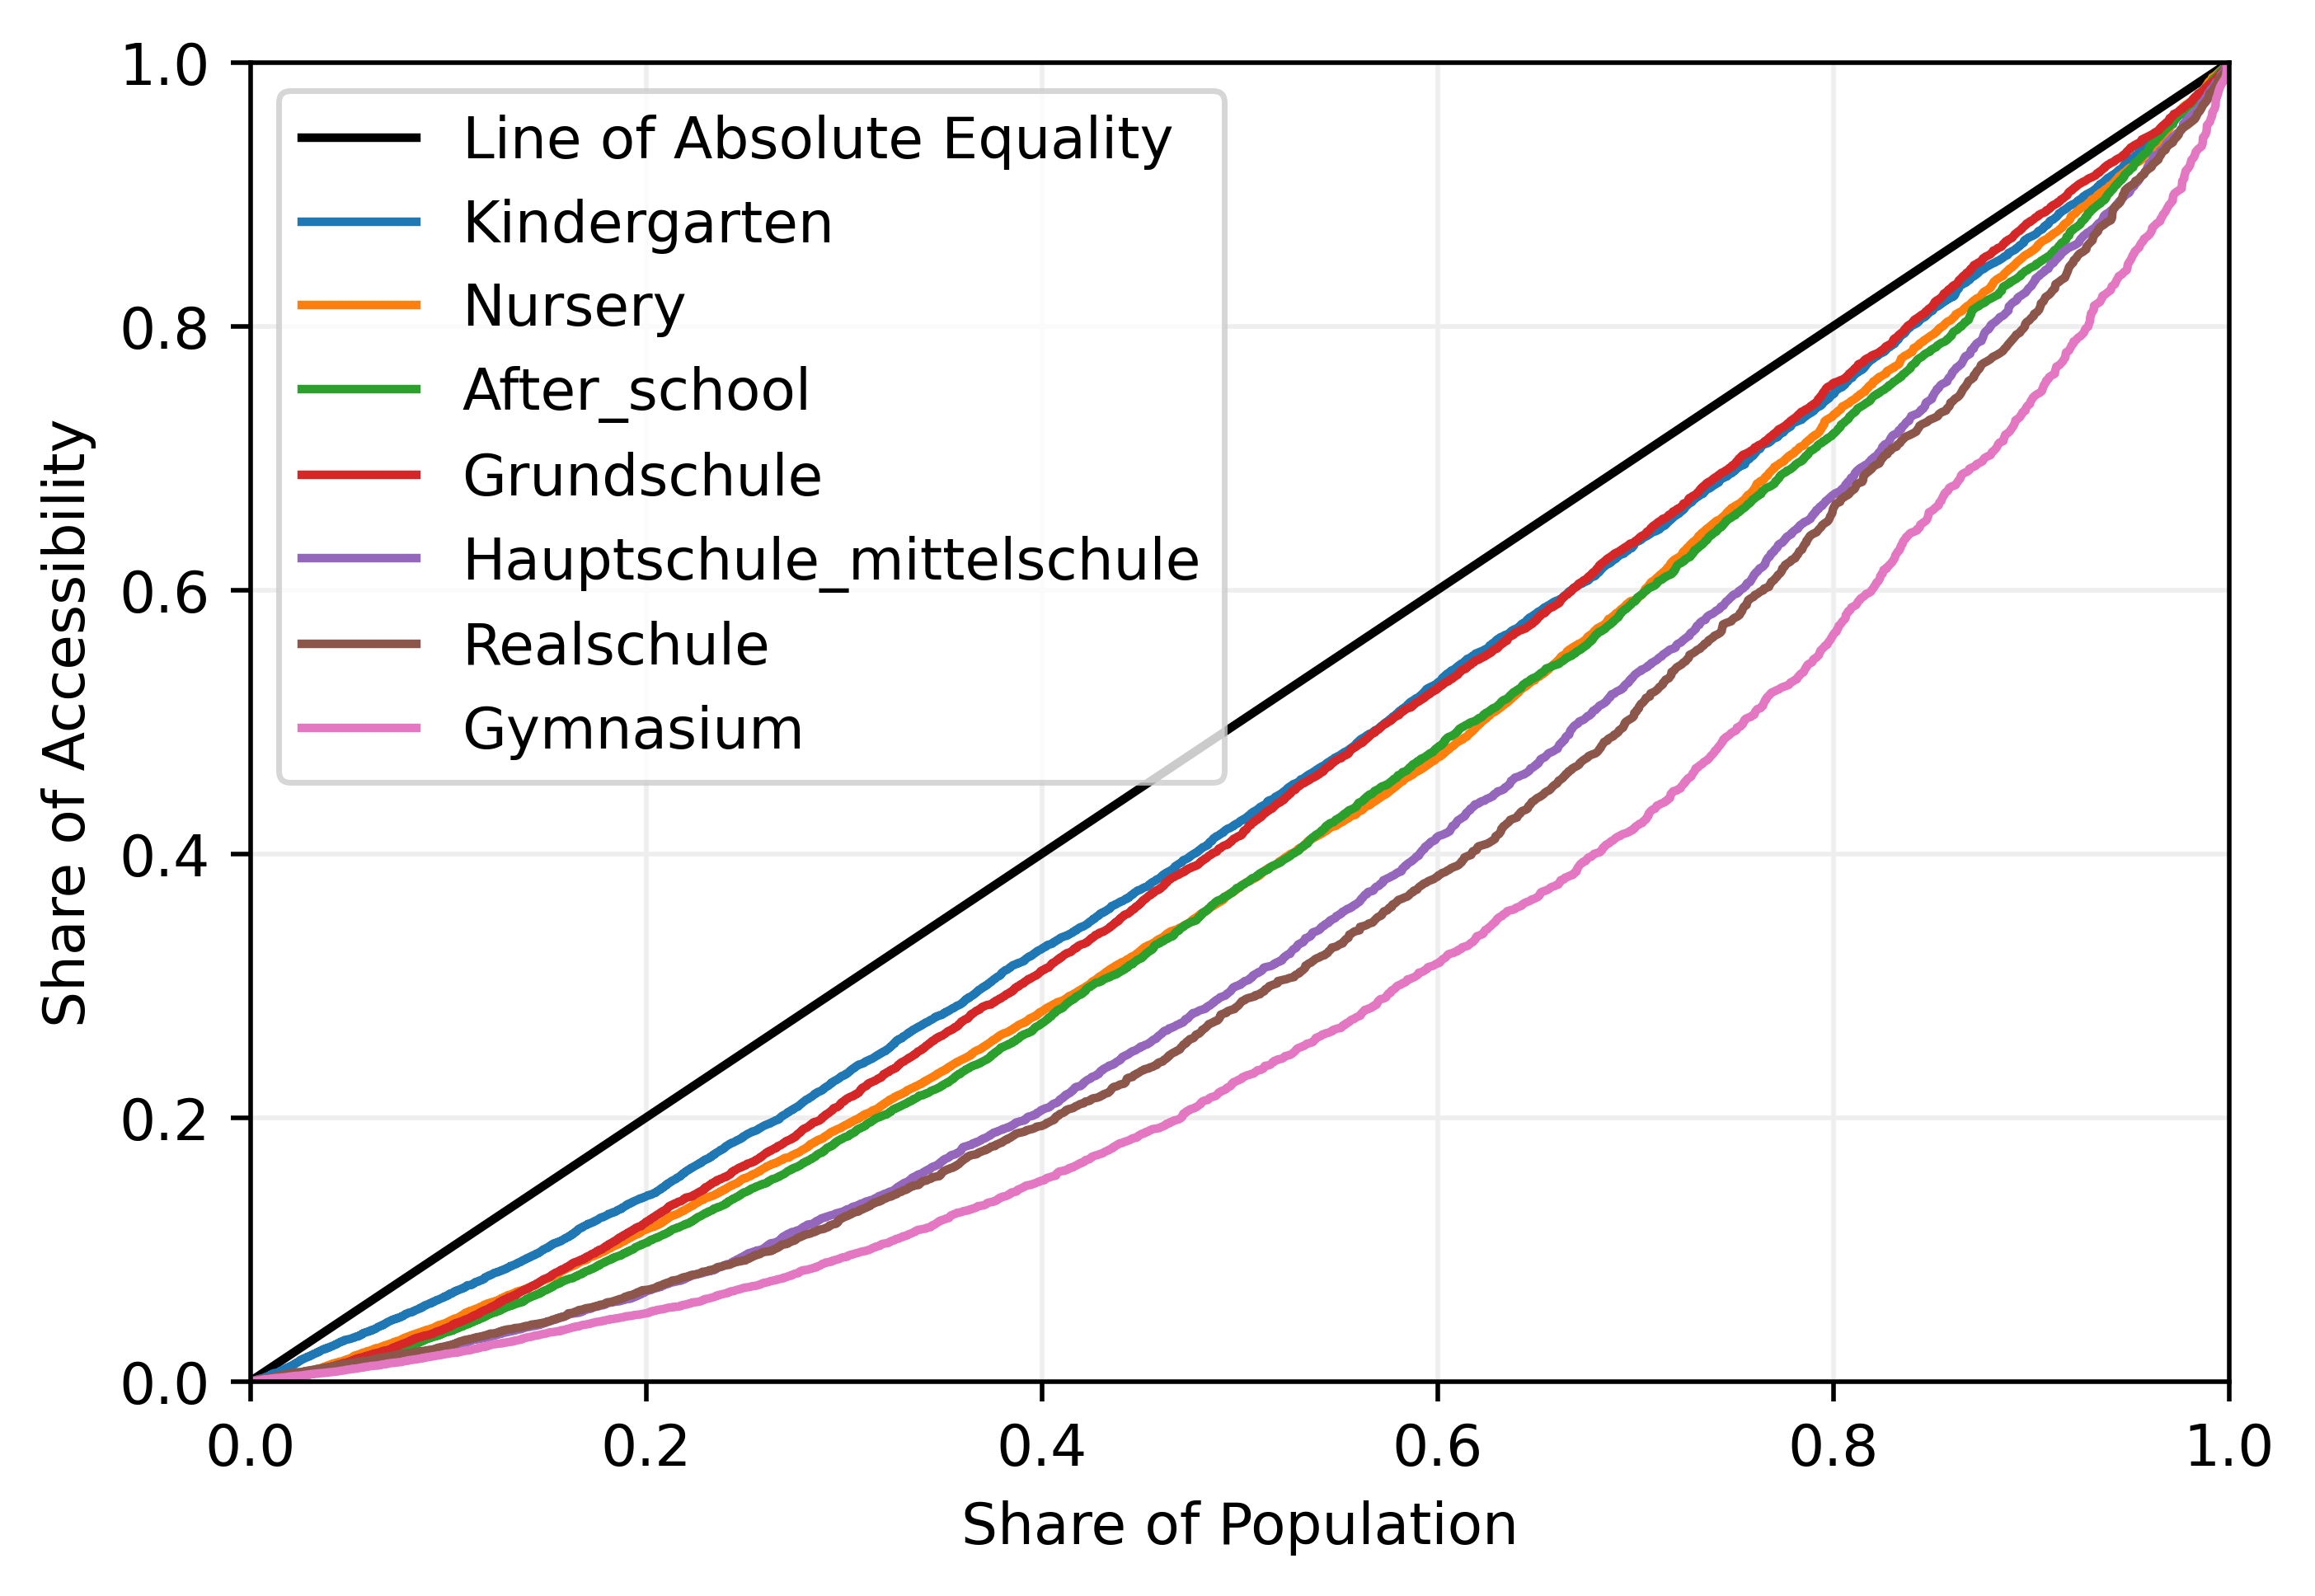

In [11]:
gini(data,amenities_education,'population')
lorenz(data,amenities_education,'population')

Pharmacy 0.2769225330017312
General_Practitioner 0.3189059735382382
Paediatrician 0.30022990355192125
Gynaecologist 0.5975581013910742
Dentist 0.4371297694182439


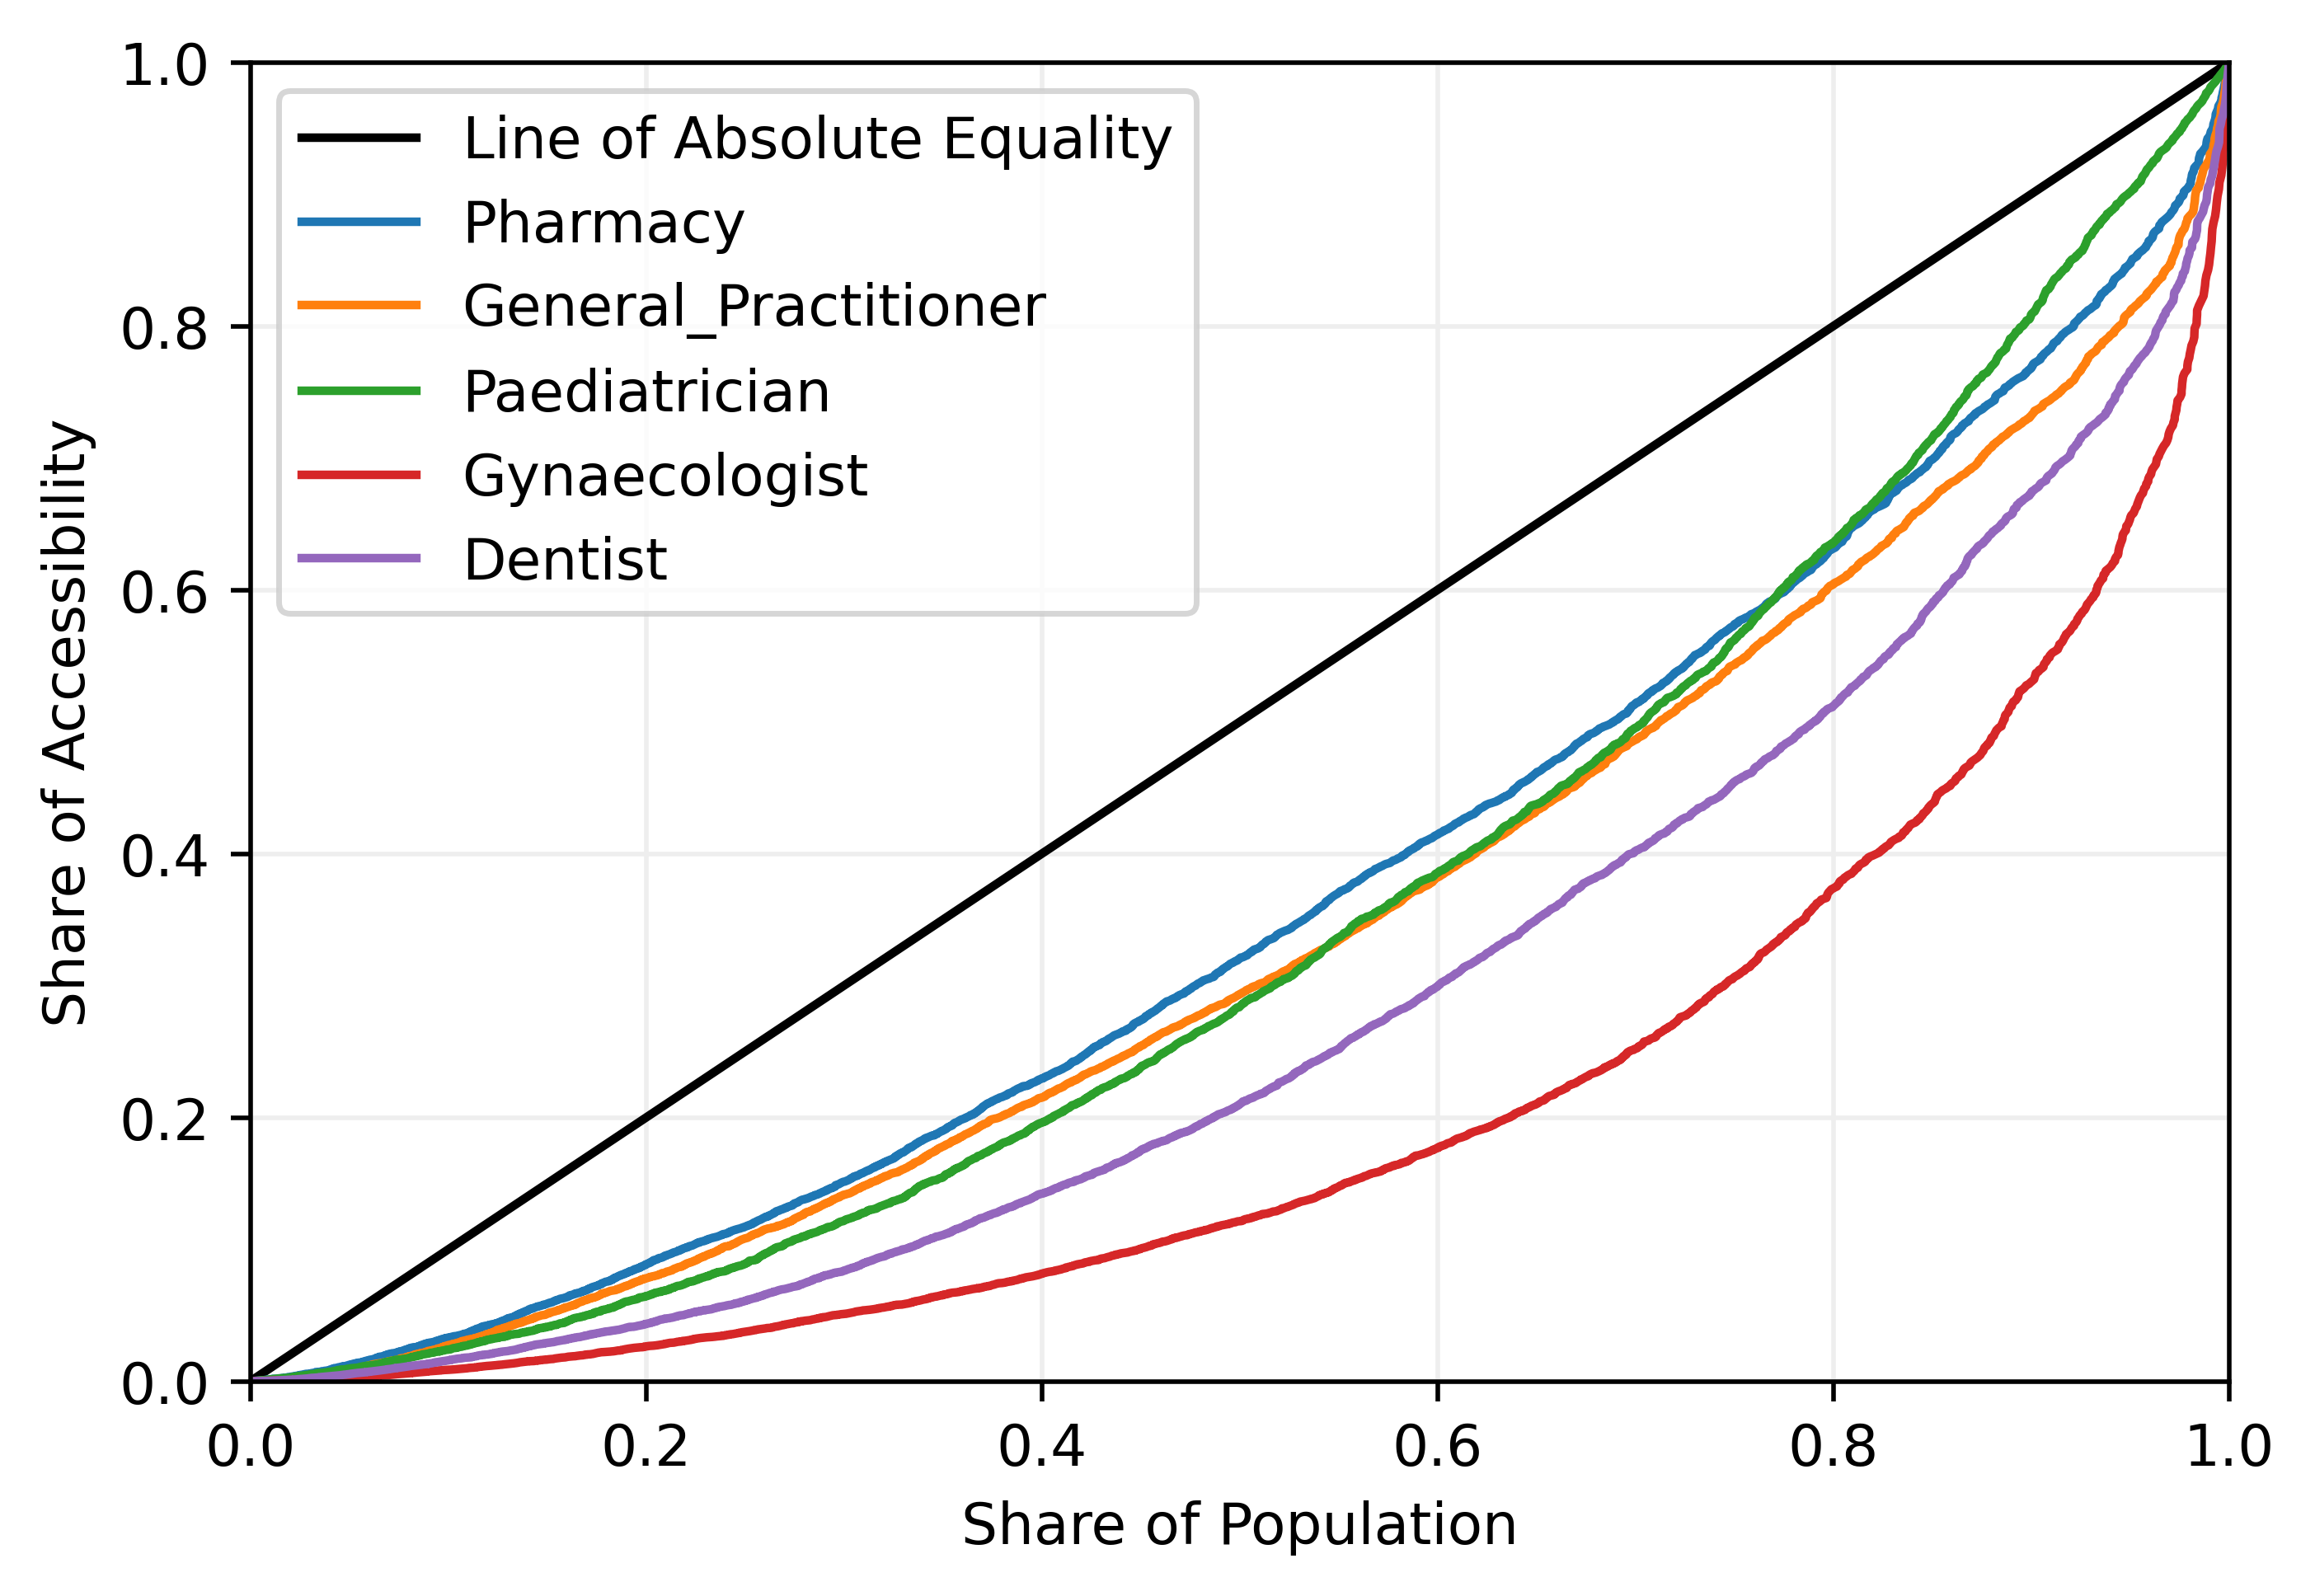

In [9]:
gini(data,amenities_health,'population')
lorenz(data,amenities_health,'population')

Food_Retail 0.16602183955044555
Supermarket 0.21246328953098736
Discount_Supermarket 0.2021536896977156
Organic 0.2823892579707995


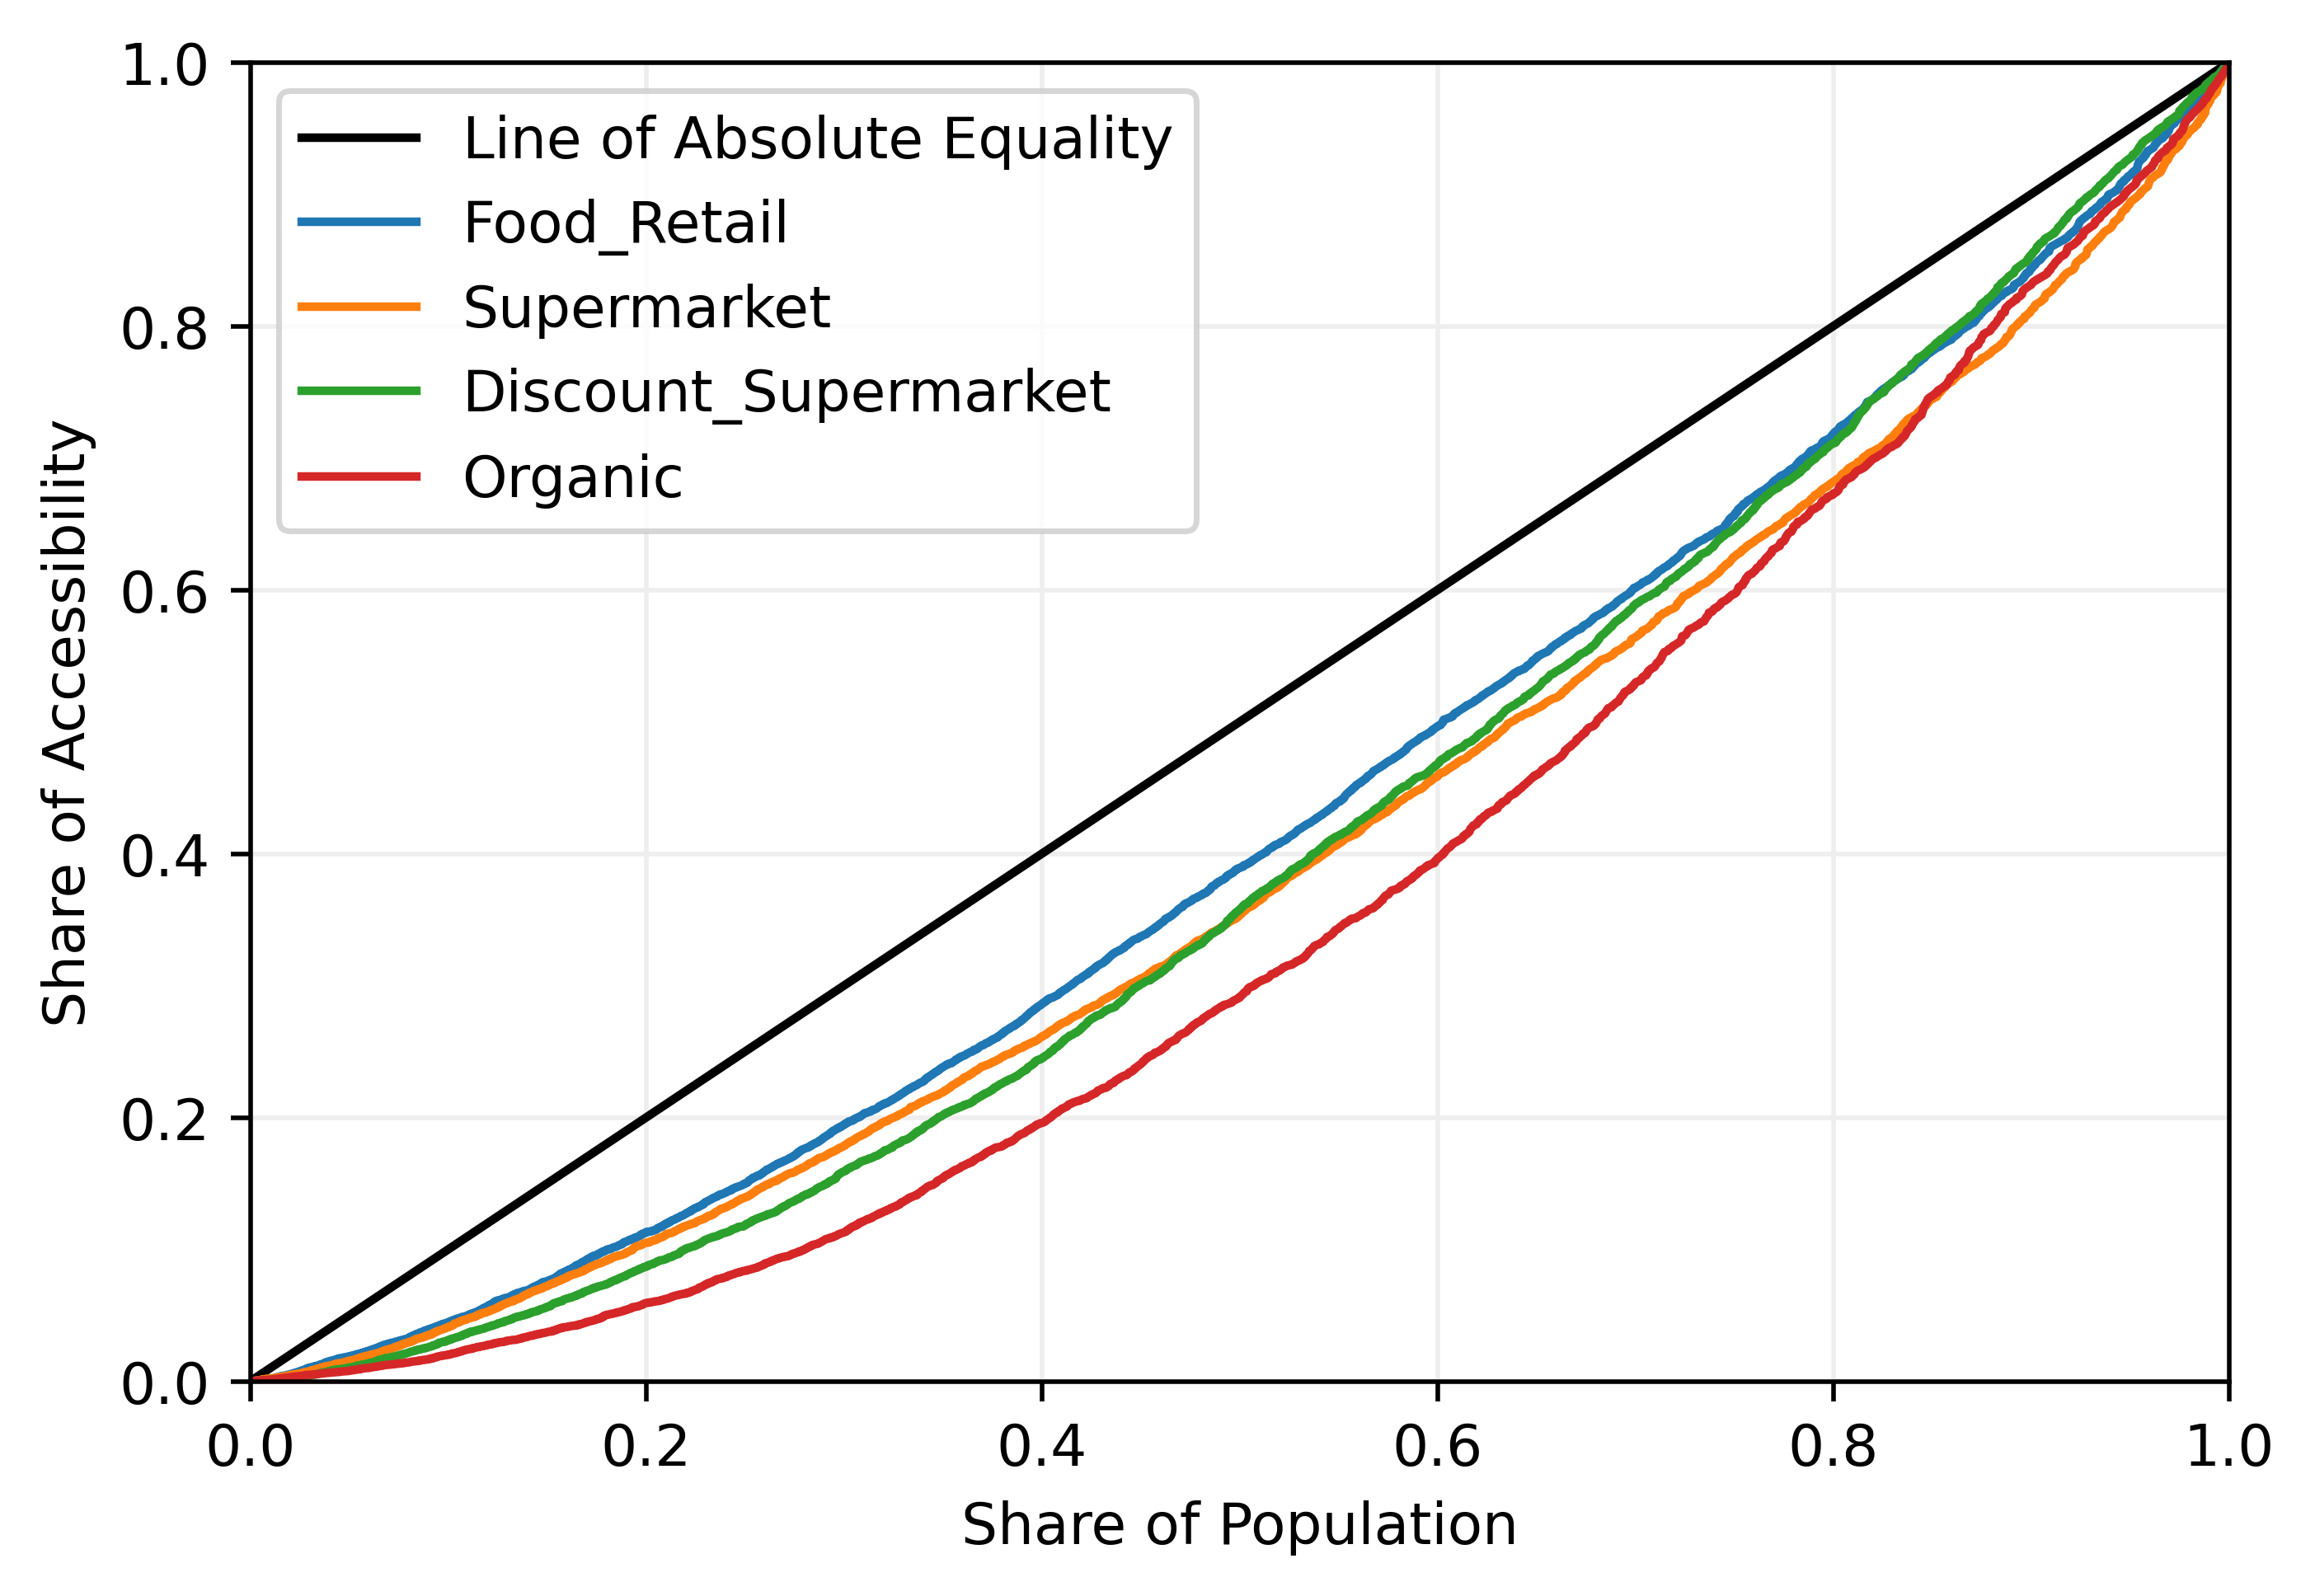

In [12]:
gini(data,amenities_food,'population')
lorenz(data,amenities_food,'population')

bus_stop 0.08527692430878911
tram_stop 0.3856587811888741
subway_entrance 0.3370141781167894
rail_station 0.5287635691879177


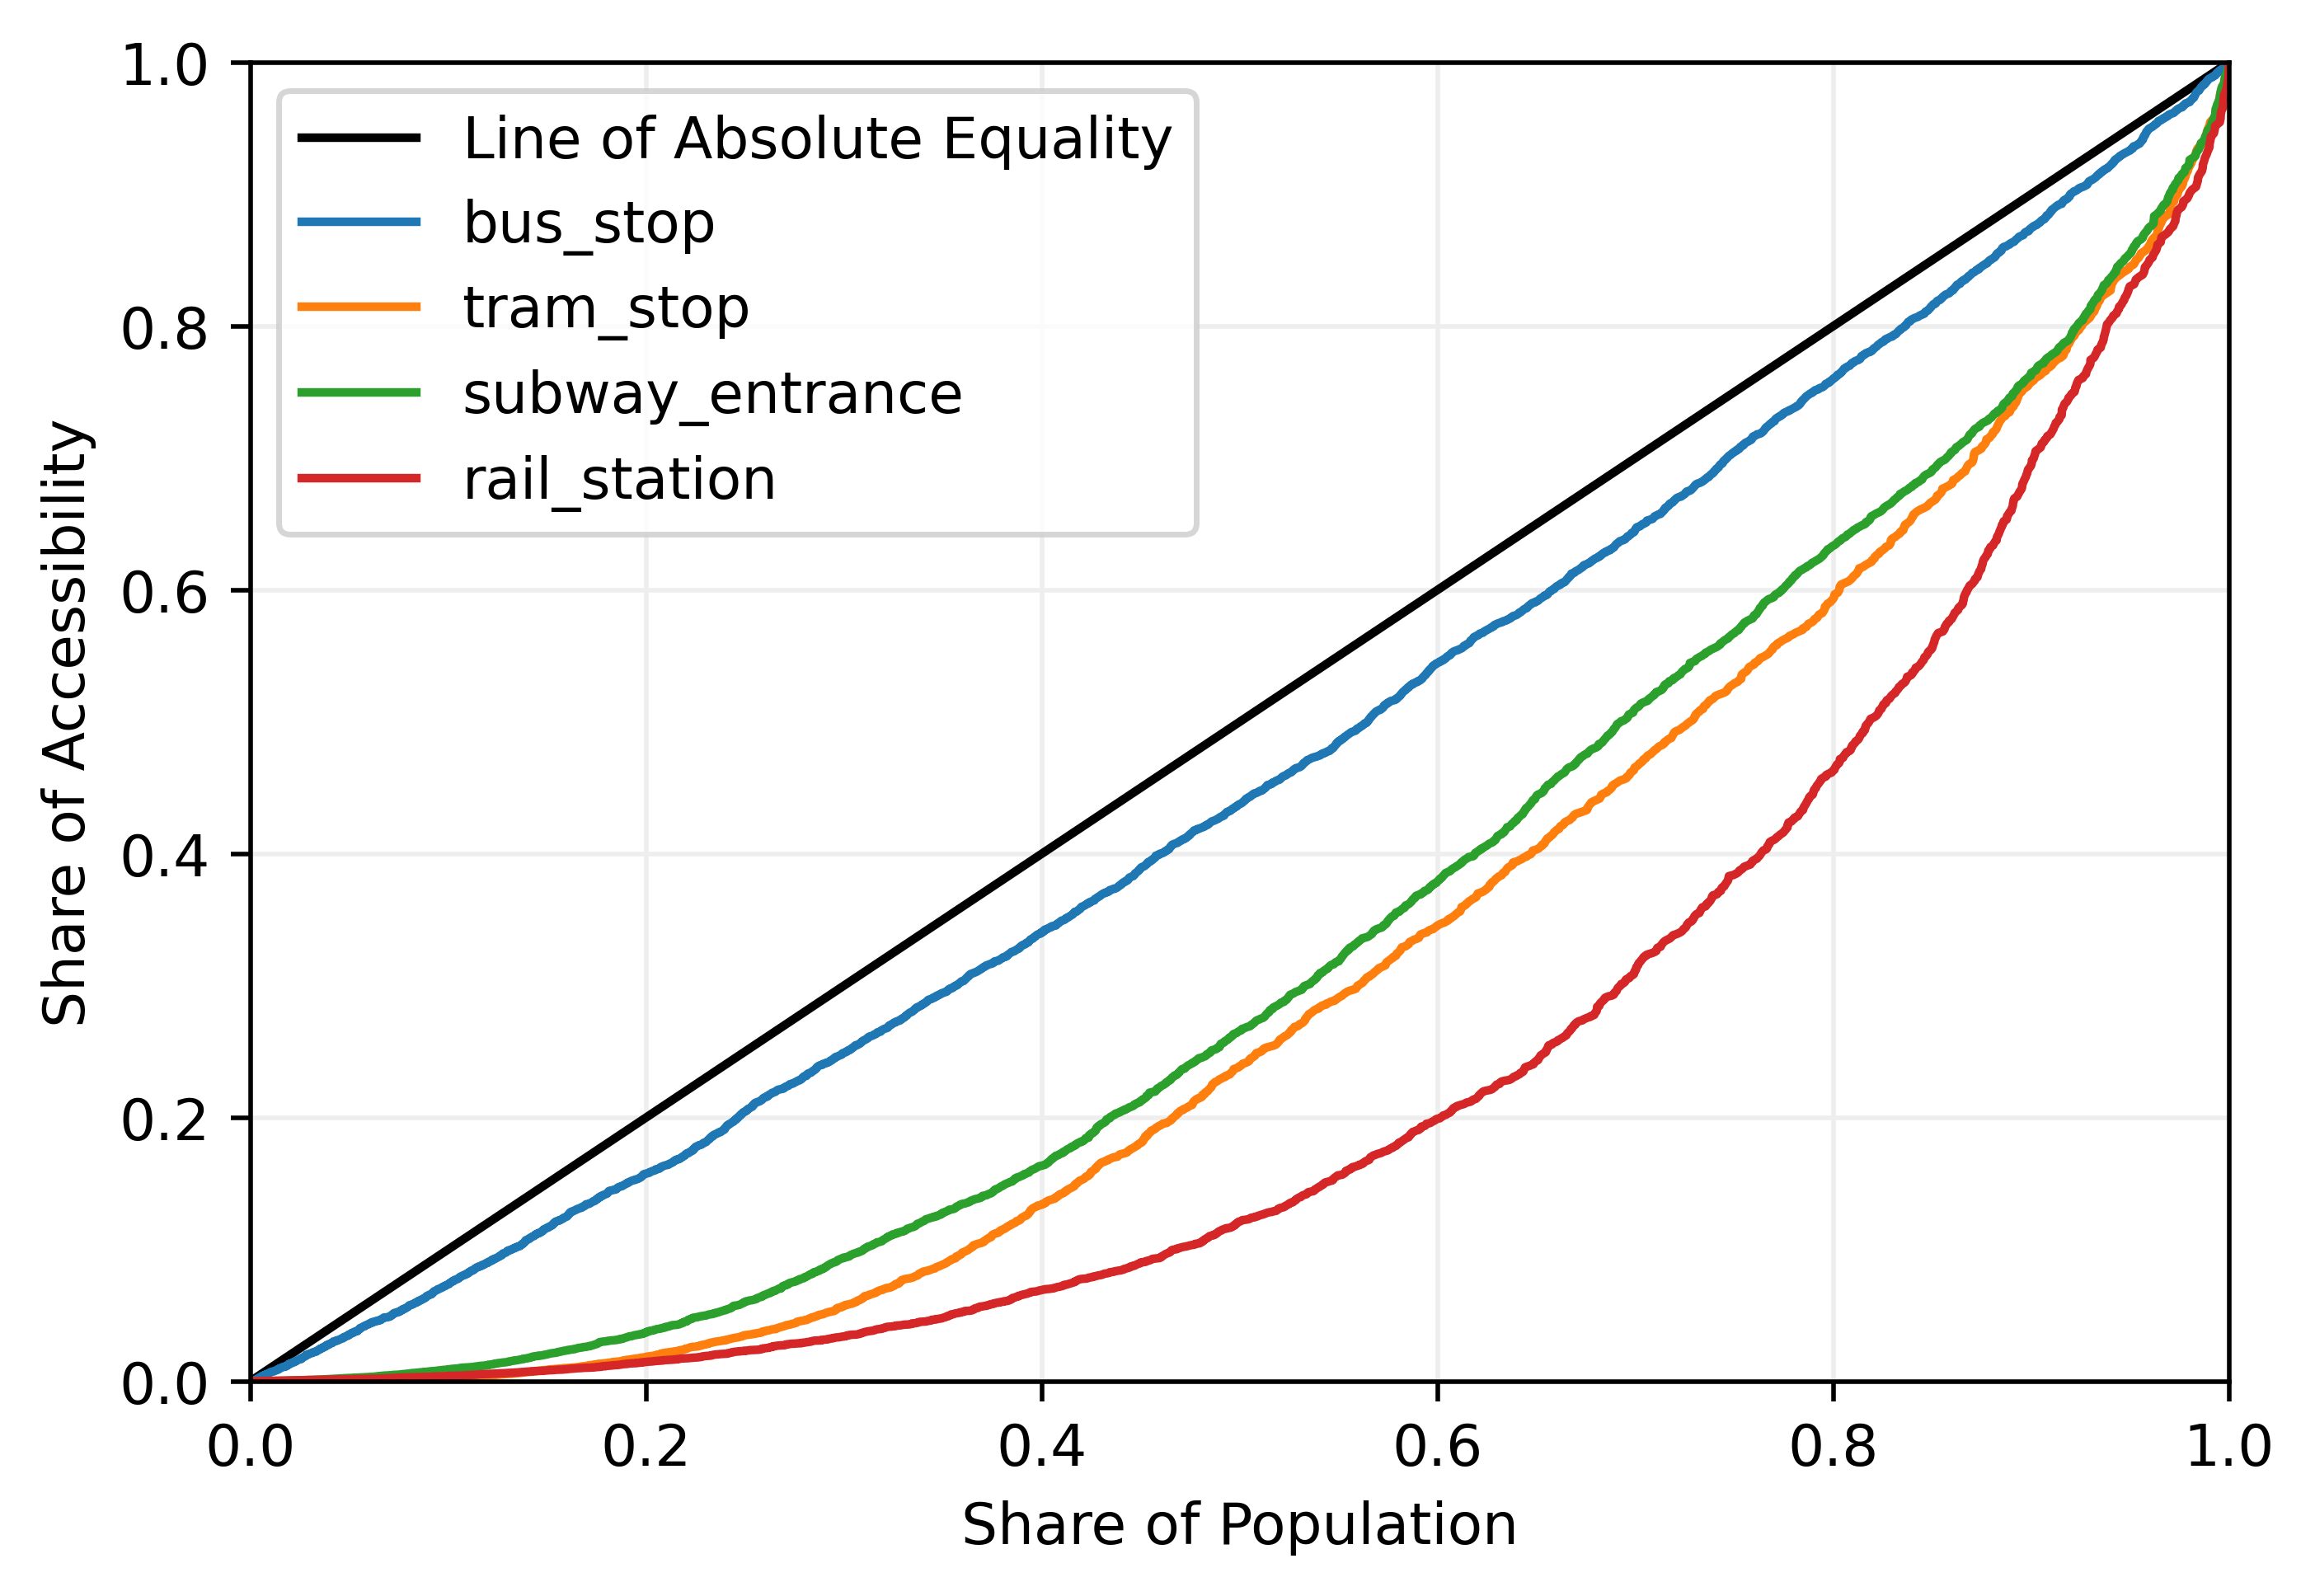

In [13]:
gini(data,amenities_transport,'population')
lorenz(data,amenities_transport,'population')

In [17]:
#Lorenz-Curve
def lorenz2(data, amenities, population):
    for category in amenities:
        a = plt.figure(num=1,dpi=500)
        axes = a.add_axes([0.1,0.1,0.8,0.8])
        axes.set_xlim([0,1])
        axes.set_ylim([0,1])
        axes.set_xlabel('Share of Population')        
        axes.set_ylabel('Share of Accessibility')
        axes.grid(True, color ='#EEEEEE')
        perfect_line = plt.plot ([0,1],[0,1], label = 'Line of Absolute Equality', color = 'black')
        df1 = data[data[category.lower()]>0]
        for userGroup in population:
            df2 = df1[df1[userGroup.lower()]>0]
            order_ai = df2.sort_values(by=[category.lower()], ascending=True)
            order_pop = df2.sort_values(by=[userGroup.lower()], ascending=True)
            sum_ai = np.sum(order_ai[category.lower()])
            sum_pop = np.sum(order_ai[userGroup.lower()])
            cumsum_ai = np.cumsum(order_ai[category.lower()])
            cumsum_pop = np.cumsum(order_ai[userGroup.lower()])
            x = cumsum_pop/sum_pop
            y = cumsum_ai/sum_ai
            lorenz = plt.plot(x,y, label = userGroup)
        
        plt.legend(loc='upper left')
        print(str(category))
        plt.show()

In [26]:
#Gini-Coefficient
def gini2 (data, amenities, population):
    for category in amenities:
        df1 = data[data[category.lower()]>0]
        print(category)
        for userGroup in population:
            df2 = df1[df1[userGroup.lower()]>0]
            order_ai = df2.sort_values(by=[category.lower()], ascending=True)
            order_pop = df2.sort_values(by=[userGroup.lower()], ascending=True)
            sum_ai = np.sum(order_ai[category.lower()])
            sum_pop = np.sum(order_ai[userGroup.lower()])
            cumsum_ai = list(np.cumsum(order_ai[category.lower()]))
            cumsum_pop = list(np.cumsum(order_ai[userGroup.lower()]))
            x = list(cumsum_pop/sum_pop)
            y = list(cumsum_ai/sum_ai)
            for i in range(len(cumsum_ai)):
                if i < 1:
                    kf = 0
                if i >= 1:
                    kf = kf + 0.5 * (y[i-1]+y[i]) * (x[i]-x[i-1])
            kf = 0.5 - kf
            gini = kf*((2*np.count_nonzero(df2))/(np.count_nonzero(df2)-1))
            print(userGroup, gini)

In [27]:
gini2(data,amenities_health,origin)

General_Practitioner
nomigr 0.28374628949343617
migr 0.34622853155080535
foreigner 0.3182191890415997
Paediatrician
nomigr 0.2685984498827428
migr 0.329175567375153
foreigner 0.33068053349177173
Gynaecologist
nomigr 0.5620087163280364
migr 0.6263243338185865
foreigner 0.6170042305264927
Psychotherapist
nomigr 0.57665008437064
migr 0.6470816671606997
foreigner 0.6362805235285751
Dentist
nomigr 0.3930998431246949
migr 0.47395822980069097
foreigner 0.45301633672067204
Pharmacy
nomigr 0.23417414658027833
migr 0.3028740531188864
foreigner 0.2713030434249785
